# Úkol 3

Stáhni si data ze souboru [Life-Expectancy-Data-Updated.csv](Life-Expectancy-Data-Updated.csv), která udávají průměrnou dobu života v jednotlivých zemích světa. Data pocházejí od Světové zdravotnické organizace (WHO) a Světové banky. Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

- Vyber data pro rok 2015.
- Vysvětlovanou proměnnou ve tvém modelu bude `Life expectancy`, což je průměrná délka života.
- Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec `GDP_per_capita` (hrubý domácí produkt na hlavu v dolarech). Zobraz výsledek jako graf. Dále si zobraz tabulku s využitím metody využitím modulu `scipy` a metody `summary()` a zjisti koeficient determinace.

In [3]:
import pandas
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn

data = pandas.read_csv("Life-Expectancy-Data-Updated.csv")
data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


- Pracuj s daty pouze za rok 2014.
- Vysvětlovanou proměnnou ve tvém modelu bude `Life expectancy`, což je průměrná délka života.
- Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec `GDP`. Zobraz výsledek jako graf. Dále si zobraz tabulku s využitím metody využitím modulu `scipy` a metody `summary()` a zjisti koeficient determinace.


<Axes: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

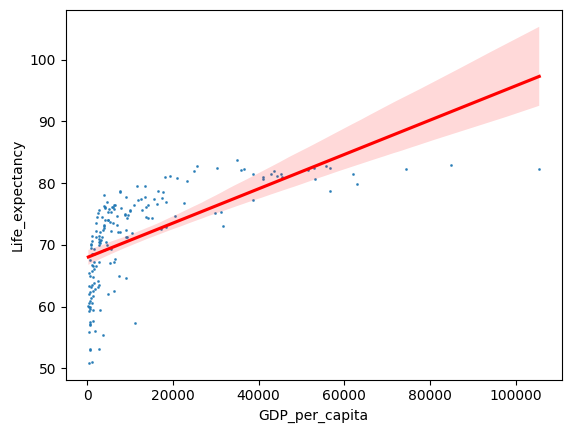

In [4]:
data = data[data["Year"] == 2015]
import numpy

seaborn.regplot(data, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

In [5]:
formula = "Life_expectancy ~ GDP_per_capita"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           3.90e-21
Time:                        11:08:27   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Koeficient determinace je 0.396.

Do modelu přidej následující sloupce:

- `Schooling` - průměrná délka studia (v letech),
- `Incidents_HIV` - nákazy virem HIV (počet případů na osobu)
- `Diphtheria` - procento populace očkované proti záškrtu,
- `Polio` - procento populace očkované proti dětské obrně,
- `BMI` - průměrný BMI index populace,
- `Measles` - procento populace očkované proti spalničkám.

In [6]:
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.22e-54
Time:                        11:08:28   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sestav model z vybraných sloupců a proveď následující kroky:

- Formuluj hypotézu o normalitě reziduí a otestuj ji s využitím modulu `scipy` a metody `summary()`. Jaký je výsledek - mají rezidua normální rozdělení?
- Jaký je koeficient determinace výsledného modelu. Porovnej ho s koeficientem determinace, který vyšel z modelu, kde byl pouze hrubý domácí produkt. Jak se změnil? A co to znamená?
- Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce `P>|t|` a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?

- H0: Rezidua mají normální rozdělení.
- H1: Rezidua nemají normální rozdělení.

p-hodnoty obou testů jsou vyšší než 0.05, nezamítáme H0.

Koeficient determinace se zvýšil na 0.79, model tedy vysvětluje délku života lépe.

Odebereme sloupec `Diphtheria` - má nejvyšší p-hodnotu

In [7]:
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI + Measles"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.12e-55
Time:                        11:08:28   Log-Likelihood:                -482.14
No. Observations:                 179   AIC:                             978.3
Df Residuals:                     172   BIC:                             1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9505      4.003      9.481      0.000      30.049      45.852
GDP_per_capita     0.0001   1.95e-05      5.594      0.000    7.06e-05       0.000
Schooling          0.8455      0.145      5.844      0.000       0.560       1.131
Incidents_HIV     -1.4129      0.173     -8.179      0.000      -1.754      -1.072
Polio              0.1349      0.026      5.106      0.000       0.083       0.187
BMI                0.4260      0.160      2.661      0.009       0.110       0.742
Measles            0.0389      0.022      1.737      0.084      -0.005       0.083
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.993
Skew:                          -0.348   Prob(JB):                        0.136
Kurtosis:                       2.773   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vidíme, že keoficient determinace se nezměnil. Sloupec byl tedy zbytečný, očkování proti záškrtu nemá vliv na délku života.